# Dataset Overview

### Dataset description, modalities distribution and visualization

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from collections import Counter

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset

## Creation of a Dataset container

In [2]:
DATASET_PATH= '../Data'
ds = Dataset(path=DATASET_PATH)

## Dataset size

In [3]:
ds_size = len(ds)
print(f'The dataset size is {ds_size}')

The dataset size is 8


## Pie chart creation function

In [4]:
def category_pie(dataset, attribute_getter, figure_name):
    def category_list():
        categories = []
        for datapoint in dataset:
            categories += [attribute_getter(datapoint)]

        return categories
    count_dict = Counter(category_list())
    plt.figure()
    plt.title(figure_name)
    plt.pie(count_dict.values(), labels=count_dict.keys(), autopct='%1.0f%%')


## Dataset distribution analysis

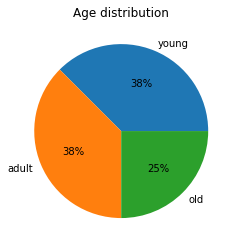

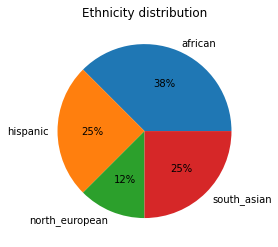

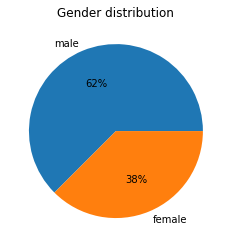

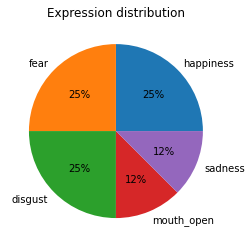

In [5]:
category_pie(ds, lambda dp : dp.identity_label.age, 'Age distribution')
category_pie(ds, lambda dp : dp.identity_label.ethnicity, 'Ethnicity distribution')
category_pie(ds, lambda dp : dp.identity_label.gender, 'Gender distribution')
category_pie(ds, lambda dp : dp.face_expression.name, 'Expression distribution')

## Dataset visualization

Normalize and clamp infinite values from depth map for better visualization

In [6]:
def normalize_depth_map(depth_map):
    depth_map = depth_map.copy()
    depth_map[depth_map > 2**15] = depth_map[depth_map < 2**15].max()
    depth_map -= depth_map.min()
    depth_map /= depth_map.max()
    depth_map = 1 - depth_map
    return depth_map

Visualize the dataset as a grid

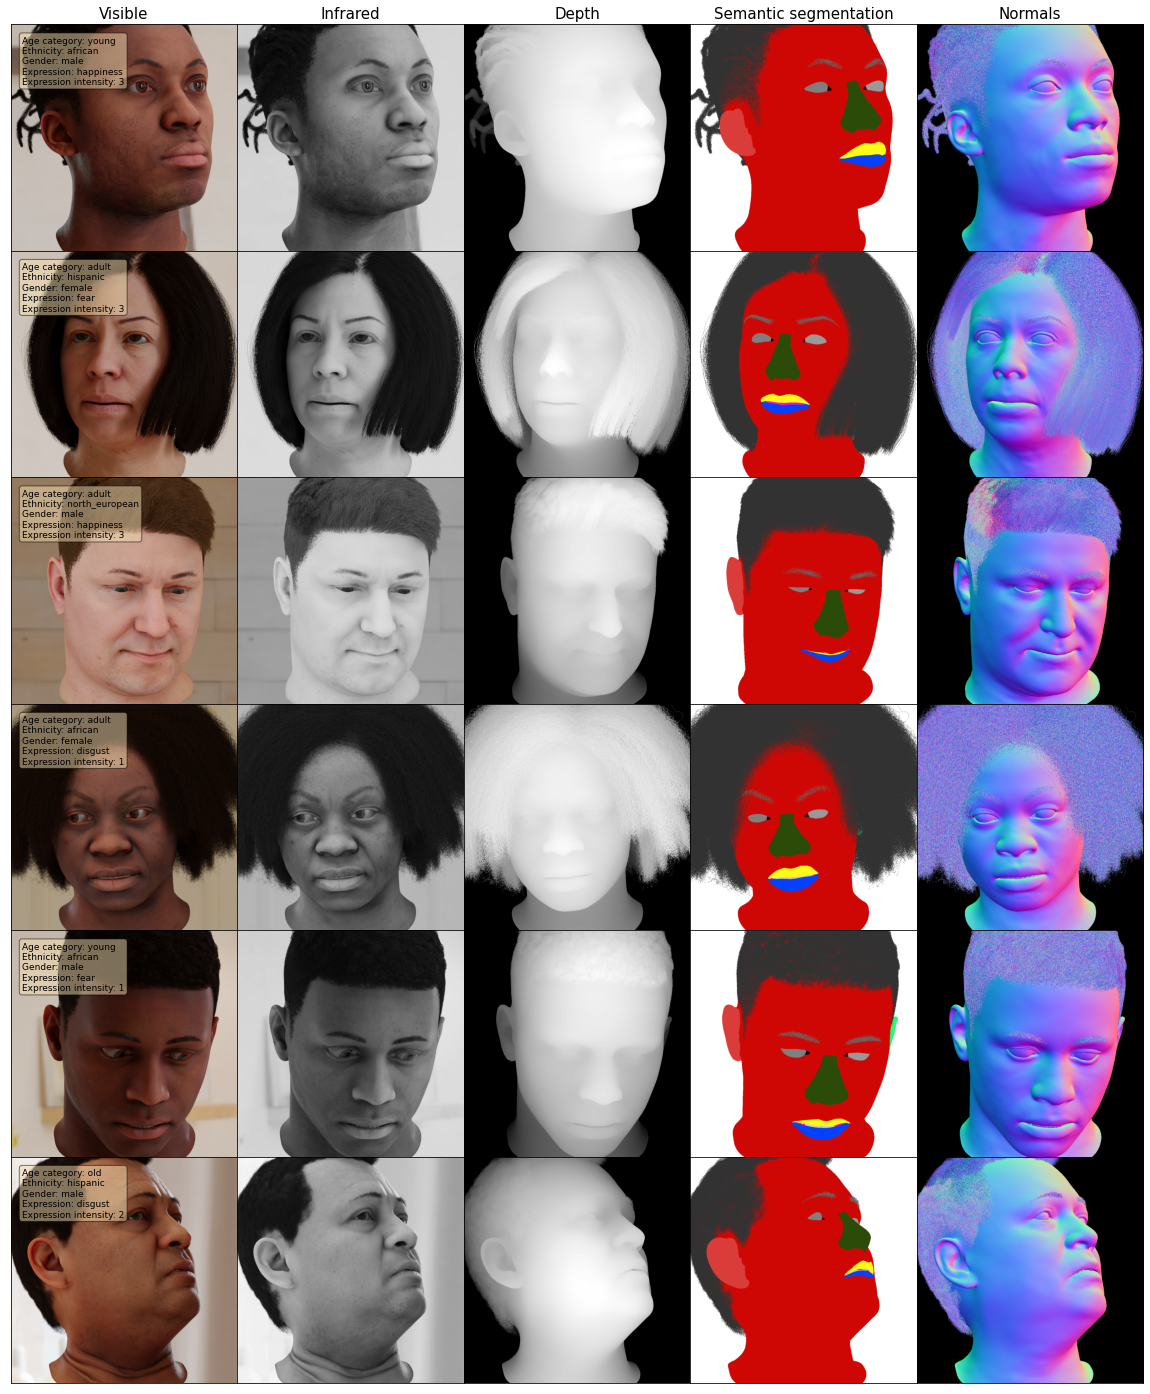

In [7]:
items_to_plot = min(len(ds), 6)
imgs_per_dp = 5
imgs, labels = [], []

for i in range(items_to_plot):
    imgs += [ds[i].rgb_img, ds[i].ir_img, normalize_depth_map(ds[i].depth_img), ds[i].semantic_seg_map, ds[i].normals_map]
    labels += imgs_per_dp * [{'Age category': ds[i].identity_label.age, 'Ethnicity': ds[i].identity_label.ethnicity, 'Gender': ds[i].identity_label.gender, 
    'Expression': ds[i].face_expression.name, 'Expression intensity': str(ds[i].face_expression.intensity_level)}]

font_size = 15
fig_shape = np.array((items_to_plot, 5))
fig_size = 5 * fig_shape
fig = plt.figure(figsize=fig_size)
grid = ImageGrid(fig, 111, nrows_ncols=fig_shape, axes_pad=0.)

grid[0].set_title('Visible', size=font_size)
grid[1].set_title('Infrared', size=font_size)
grid[2].set_title('Depth', size=font_size)
grid[3].set_title('Semantic segmentation', size=font_size)
grid[4].set_title('Normals', size=font_size)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

for i, ax in enumerate(grid):
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.imshow(imgs[i], cmap='gray')
    formatted_label = '\n'.join(key + ': ' + val for key, val in labels[i].items())
    if i % imgs_per_dp == 0:
        ax.text(0.05, 0.95, formatted_label, transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=props)
